# Airbnb-Price-Predictions-Florida Edition

## Summary
This notebook presents an exploratory data analysis (EDA) of Airbnb listings in Florida. The dataset used in this analysis contains information about various properties listed on Airbnb, including their location, amenities, pricing, and host details. The purpose of this analysis is to gain insights into the dataset and uncover patterns and trends related to the Airbnb listings in Florida.

---

## Overview of the Dataset
The dataset consists of several columns that provide information about each Airbnb listing. Some of the key columns include:
- `id`: Unique identifier for each listing.
- `name`: The name or title of the listing.
- `description`: A description of the property.
- `neighbourhood`: The neighbourhood where the property is located.
- `room_type`: The type of room or property (e.g., entire home, private room, shared room).
- `price`: The price per night for the listing.
- `amenities`: A list of amenities available at the property.

By performing exploratory data analysis on this dataset, we aim to understand the distribution of Airbnb listings across different neighbourhoods, explore the relationship between various numeric variables such as price and the number of bedrooms, and identify the top amenities offered by Airbnb hosts in Florida.

---


# Table of Contents

1. [Imports](#Imports)
2. [EDA](#EDA)
3. [Data Cleaning](#Data-Cleaning)
4. [Histogram of Numeric Columns](#Histogram-of-Numeric-Columns)
5. [Correlation Heatmap of Numeric Columns](#Correlation-Heatmap-of-Numeric-Columns)
6. [Pairplot of Numeric Columns](#Pairplot-of-Numeric-Columns)
7. [Top Amenities](#Top-Amenities)
8. [Room Type Distribution](#Room-Type-Distribution)
9. [Neighbourhood Distribution](#Neighbourhood-Distribution)

---

## Imports

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [9]:
listings = pd.read_csv('../data/listings-3.csv')

## EDA

In [10]:
# Displaying the first few rows of the dataset
listings.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,827736378366911479,https://www.airbnb.com/rooms/827736378366911479,20230327145536,2023-03-27,city scrape,Legion 1BR/1BA,Take it easy at this unique and tranquil getaway.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,475630606,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
1,592589963829194972,https://www.airbnb.com/rooms/592589963829194972,20230327145536,2023-03-28,city scrape,Club Wyndham Royal Vista,"Located directly on the beach, the property si...",NaN,https://a0.muscache.com/pictures/8a429c15-ea50...,66506549,...,NaN,NaN,NaN,NaN,f,5,0,5,0,NaN


In [11]:
# Checking the shape of the dataset
listings.shape

(16899, 75)

In [12]:
# Descriptive statistics of the dataset
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.689900e+04,1.689900e+04,1.689900e+04,16898.000000,16898.000000,0.0,16899.000000,16899.000000,16899.000000,0.0,...,14023.000000,14023.000000,14023.000000,14023.000000,0.0,16899.000000,16899.000000,16899.000000,16899.000000,14062.000000
mean,3.334714e+17,2.023033e+13,2.003555e+08,74.536336,110.687833,NaN,26.103429,-80.145142,5.169477,NaN,...,4.793568,4.791792,4.779039,4.641546,NaN,18.621398,17.481508,1.024558,0.098171,1.665793
std,3.612008e+17,0.000000e+00,1.656271e+08,314.697442,498.317014,NaN,0.098679,0.055160,3.125862,NaN,...,0.423552,0.433436,0.370587,0.471551,NaN,40.525624,40.169195,3.864148,1.207154,1.553133
min,5.781800e+04,2.023033e+13,5.146000e+03,1.000000,1.000000,NaN,25.957323,-80.428120,0.000000,NaN,...,0.000000,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,4.229006e+07,2.023033e+13,4.889588e+07,2.000000,2.000000,NaN,26.008728,-80.154830,3.000000,NaN,...,4.750000,4.760000,4.720000,4.530000,NaN,1.000000,1.000000,0.000000,0.000000,0.520000
50%,5.365582e+07,2.023033e+13,1.516411e+08,6.000000,8.000000,NaN,26.111060,-80.126690,4.000000,NaN,...,4.940000,4.930000,4.880000,4.760000,NaN,4.000000,3.000000,0.000000,0.000000,1.230000
75%,7.067344e+17,2.023033e+13,3.687955e+08,24.000000,34.000000,NaN,26.172690,-80.116367,6.000000,NaN,...,5.000000,5.000000,5.000000,4.920000,NaN,17.000000,14.000000,0.000000,0.000000,2.380000
max,8.559792e+17,2.023033e+13,5.067595e+08,4809.000000,8427.000000,NaN,26.333410,-80.075020,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,NaN,259.000000,258.000000,39.000000,22.000000,30.150000


In [13]:
# Data types of the columns
listings.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object

In [14]:
# Information about the dataset including missing values
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16899 entries, 0 to 16898
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            16899 non-null  int64  
 1   listing_url                                   16899 non-null  object 
 2   scrape_id                                     16899 non-null  int64  
 3   last_scraped                                  16899 non-null  object 
 4   source                                        16899 non-null  object 
 5   name                                          16898 non-null  object 
 6   description                                   16673 non-null  object 
 7   neighborhood_overview                         10460 non-null  object 
 8   picture_url                                   16899 non-null  object 
 9   host_id                                       16899 non-null 

## Data Cleaning

In [15]:
# Removing non-numeric characters and converting 'price' column to float
listings['price'] = listings['price'].apply(lambda x: float(''.join(filter(str.isdigit, str(x)))))

In [31]:
# Dropping irrelevant columns and handling missing values
irrelevant_columns = ['listing_url', 'scrape_id', 'bathrooms', 'neighbourhood_group_cleansed',
                      'source', 'picture_url', 'host_id', 'host_url', 'host_since', 'host_about',
                      'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
                      'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count',
                      'host_total_listings_count', 'host_verifications', 'host_has_profile_pic',
                      'host_identity_verified', 'neighbourhood_cleansed', 'calendar_updated', 'has_availability',
                      'availability_30', 'availability_60', 'availability_90', 'availability_365',
                      'calendar_last_scraped', 'number_of_reviews_ltm',
                      'number_of_reviews_l30d', 'first_review', 'review_scores_rating', 'review_scores_accuracy',
                      'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                      'review_scores_location', 'review_scores_value', 'license', 'instant_bookable',
                      'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
                      'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']


In [35]:
listings_cleaned = listings.drop(columns=irrelevant_columns).fillna({
    'name': 'Unnamed',
    'description': 'No description available',
    'neighborhood_overview': 'No description available',
    'host_name': 'Unnamed',
    'host_location': 'No location',
})

In [36]:
# Drop missing values in the 'last_review' and 'neighbourhood' column
listings_cleaned.dropna(subset=['last_review', 'neighbourhood'], inplace=True)

In [37]:
# Saving the cleaned dataset as a CSV file
listings_cleaned.to_csv('../data/cleaned_listings.csv', index=False)

## Histogram of Numeric Columns

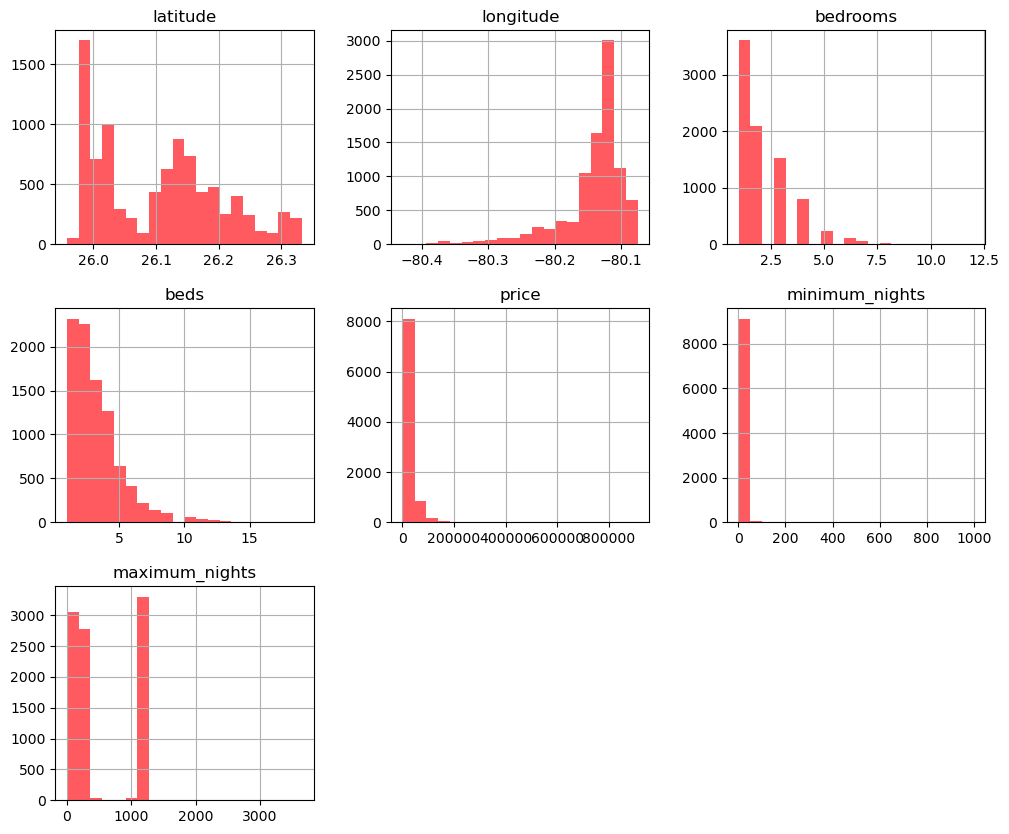

In [38]:
airbnb_colors = ["#FF5A5F", "#FF3839", "#484848", "#767676"]

numeric_columns = ['latitude', 'longitude', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights']
listings_cleaned[numeric_columns].hist(bins=20, figsize=(12, 10), color=airbnb_colors[0])
plt.show()

## Correlation Heatmap of Numeric Columns

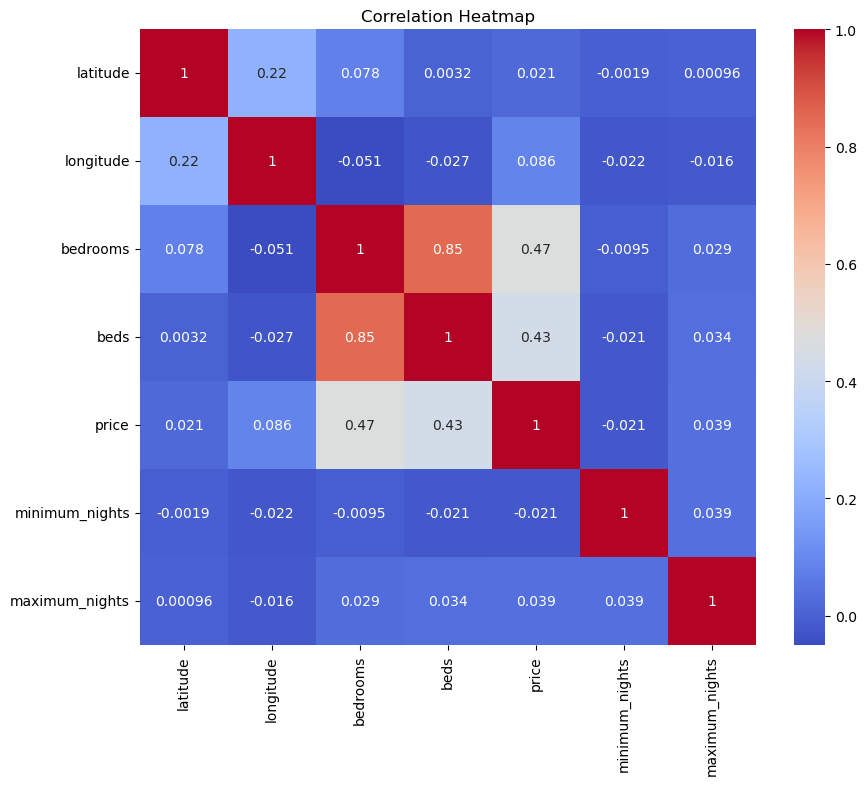

In [43]:
correlation_matrix = listings_cleaned[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

## Pairplot of Numeric Columns

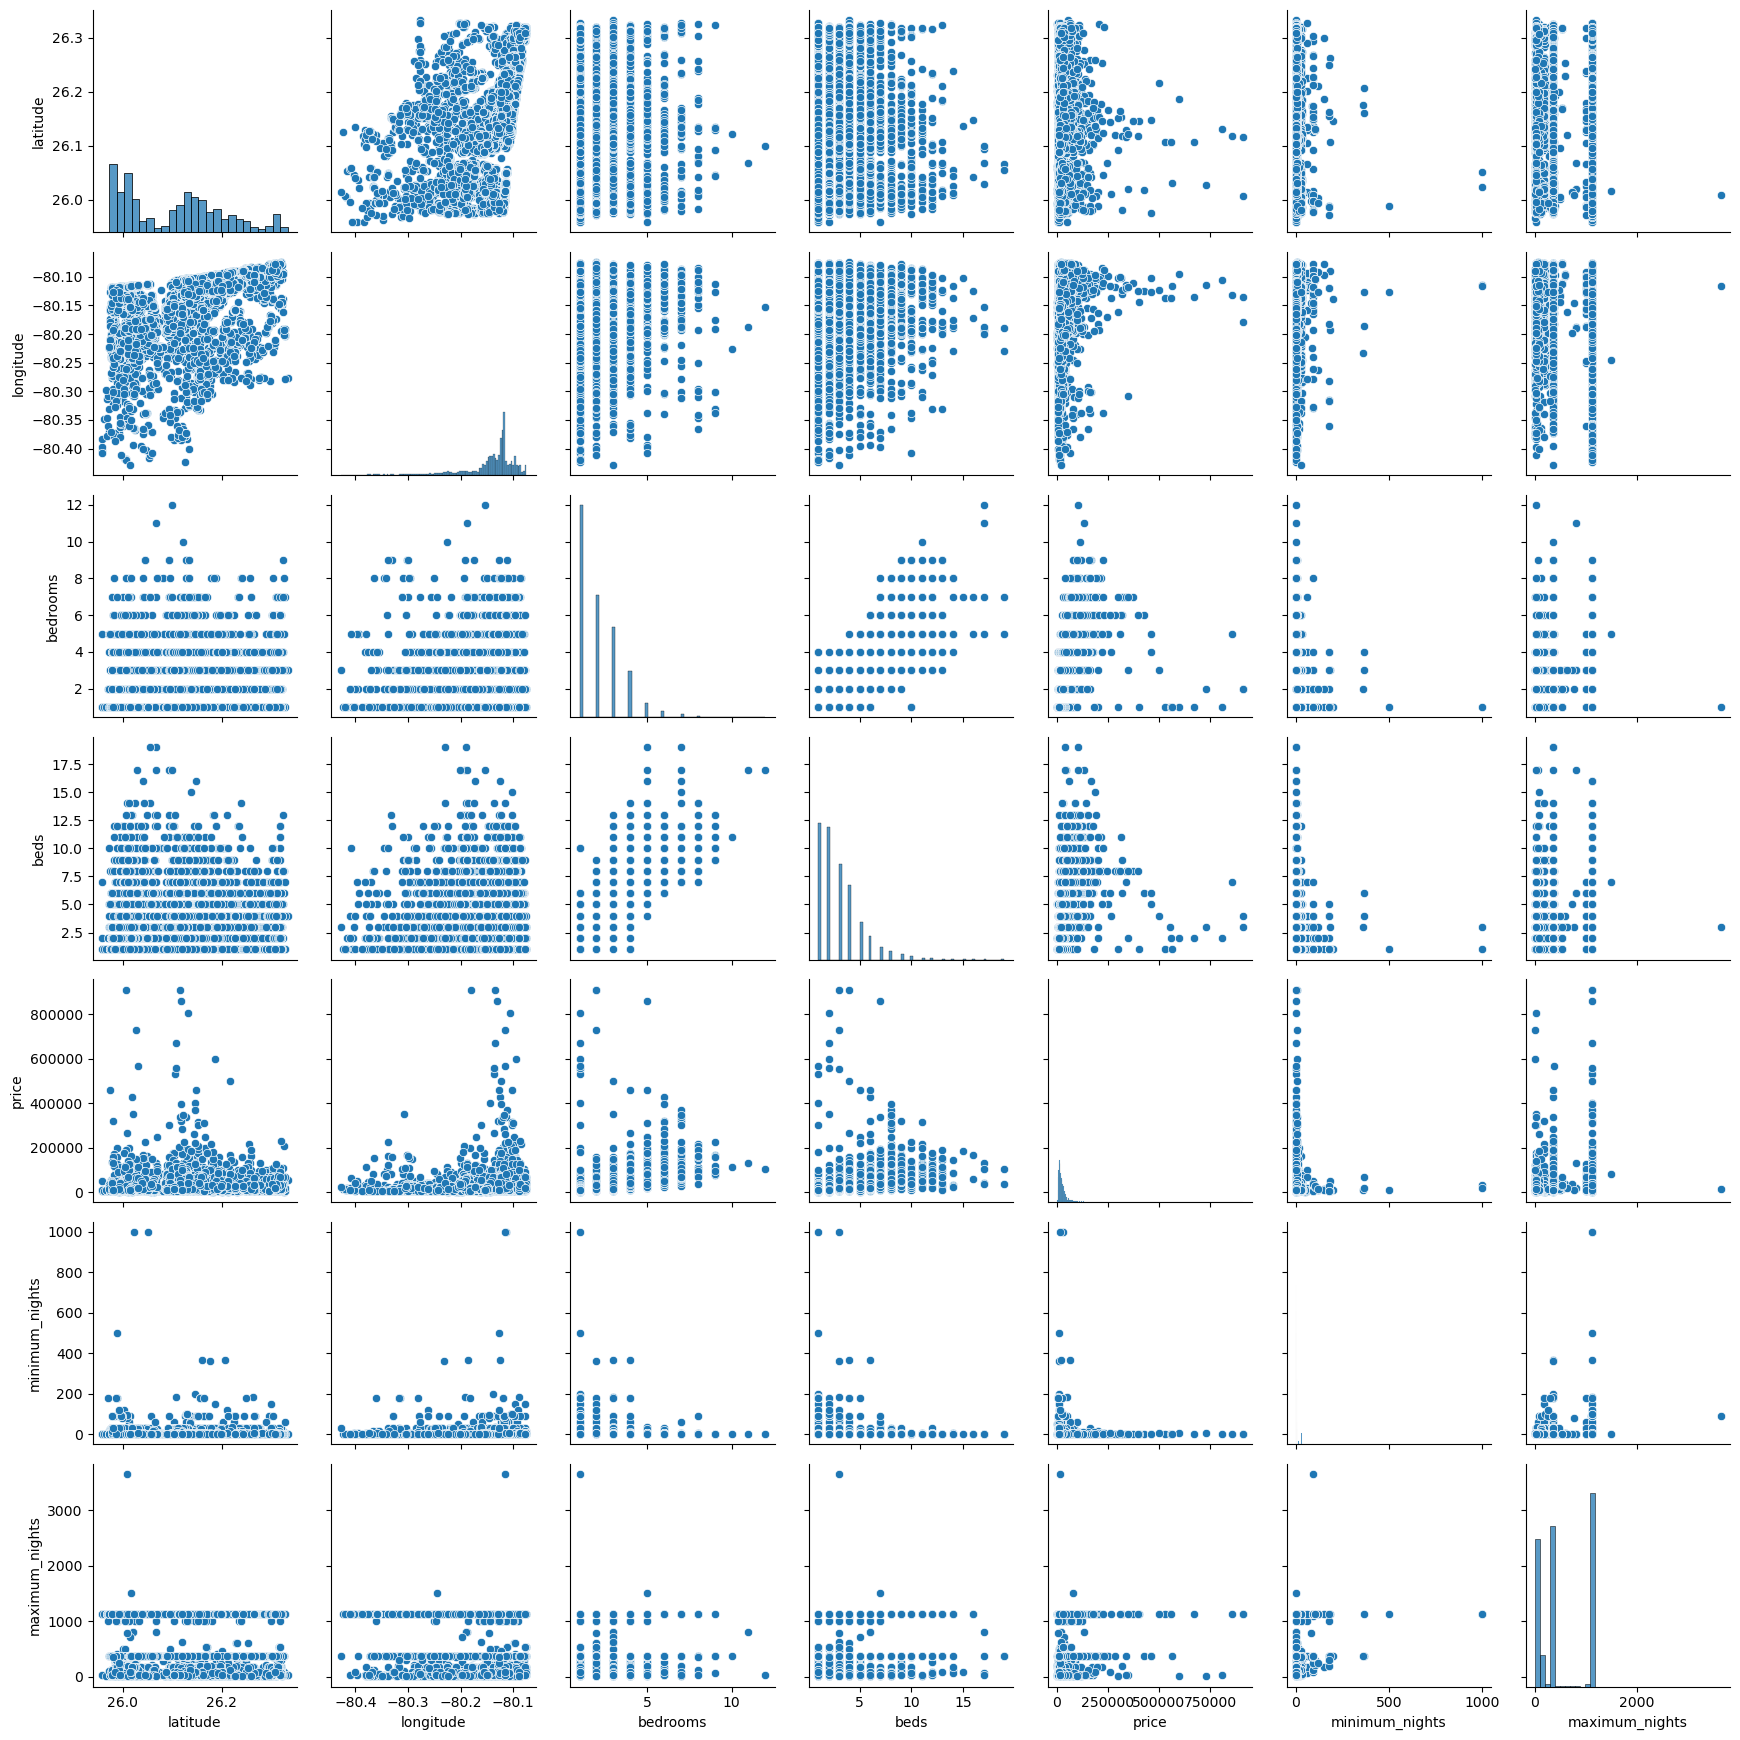

In [40]:
sns.pairplot(listings_cleaned[numeric_columns])
plt.tight_layout()
plt.show()


## Top Amenities

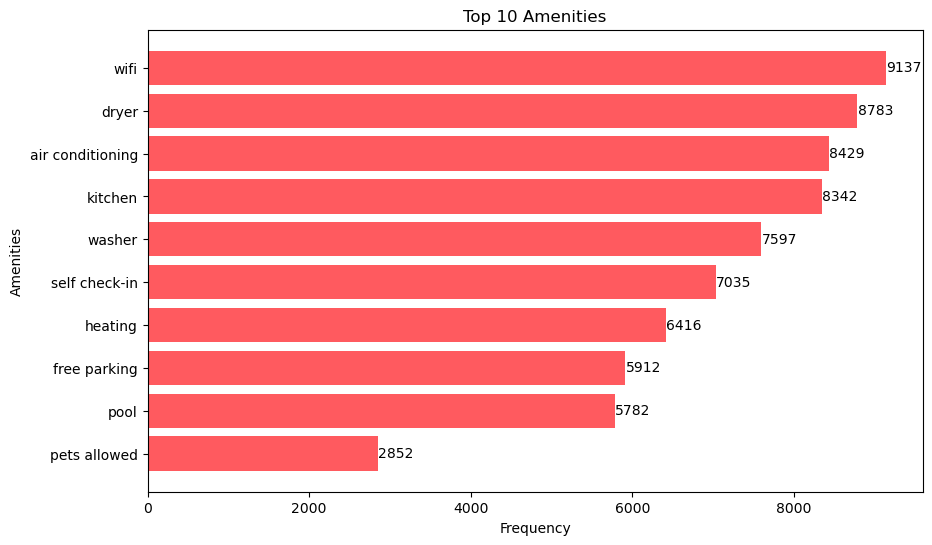

In [51]:
airbnb_logo_color = '#FF5A5F'

# List of amenities to analyze based on airbnb website
amenities_to_analyze = ['pool', 'wifi', 'kitchen', 'free parking', 'jacuzzi',
                       'washer', 'dryer', 'air conditioning', 'heating',
                       'self check-in', 'laptop-friendly workspace', 'pets allowed']

# Frequency of each amenity
amenity_frequency = Counter()

# Count the occurrences of each amenity
for index, row in listings_cleaned.iterrows():
    amenities = row['amenities'].lower()
    for amenity in amenities_to_analyze:
        if amenity in amenities:
            amenity_frequency[amenity] += 1

# Top number of amenities
number = 10
top_amenities = amenity_frequency.most_common(number)

# Extract the amenities and their frequencies
amenities, frequencies = zip(*top_amenities)

# Plot the bar chart with the custom color for the Airbnb logo
plt.figure(figsize=(10, 6))
bars = plt.barh(amenities, frequencies, color=airbnb_logo_color)
plt.xlabel('Frequency')
plt.ylabel('Amenities')
plt.title('Top {} Amenities'.format(number))
plt.gca().invert_yaxis()

# Add value labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2, str(width), ha='left', va='center')

plt.show()


**Top Amentities based on Airbnb https://www.airbnb.com/resources/hosting-homes/a/the-best-amenities-to-offer-right-now-203**

## Room Type Distribution

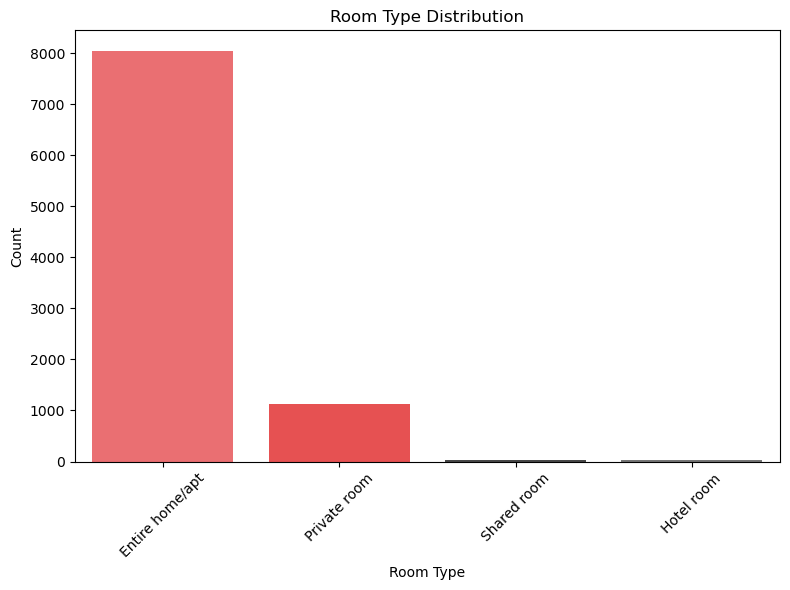

In [48]:
airbnb_colors = ["#FF5A5F", "#FF3839", "#484848", "#767676"]

room_type_counts = listings_cleaned['room_type'].value_counts()
plt.figure(figsize=(8, 6))
sns.countplot(x='room_type', data=listings_cleaned, order=room_type_counts.index, palette=airbnb_colors)
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../charts/room_type_distribution.png')
plt.show()

## Neighbourhood Distribution

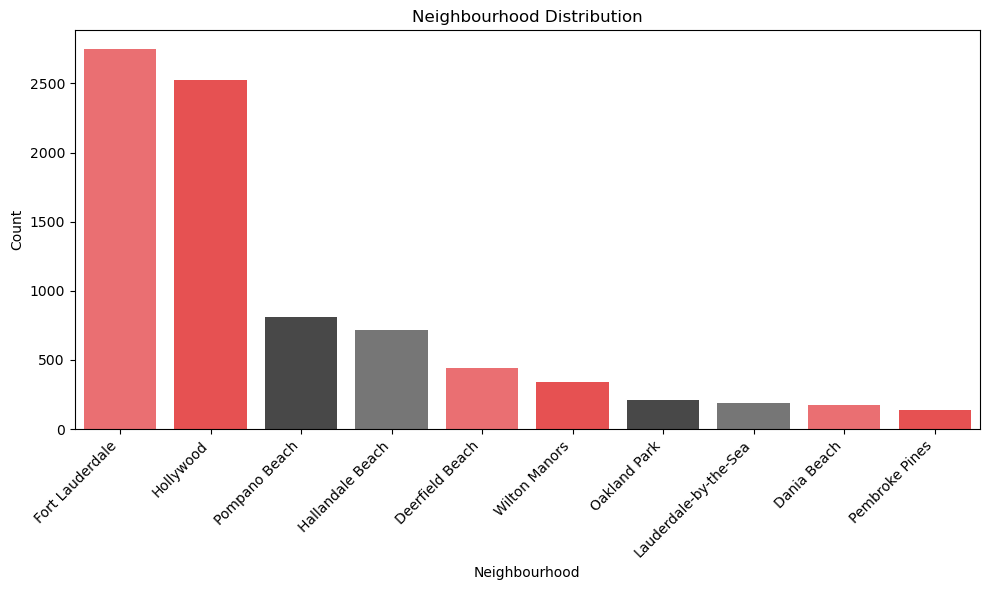

In [50]:
airbnb_colors = ["#FF5A5F", "#FF3839", "#484848", "#767676"]

neighbourhood_counts = listings_cleaned['neighbourhood'].value_counts().head(10)
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='neighbourhood', data=listings_cleaned, order=neighbourhood_counts.index, palette=airbnb_colors)
plt.title('Neighbourhood Distribution')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Modify x tick labels
x_tick_labels = ax.get_xticklabels()
modified_labels = [label.get_text().replace(', Florida, United States', '') for label in x_tick_labels]
ax.set_xticklabels(modified_labels, rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../charts/Neighbourhood_distribution.png')
plt.show()